In [1]:

!pip install prophet


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [5]:
from google.colab import files
uploaded = files.upload()


Saving churn.csv to churn.csv
Saving sales.csv to sales.csv
Saving spending.csv to spending.csv


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.50      0.20      0.29         5

    accuracy                           0.75        20
   macro avg       0.64      0.57      0.57        20
weighted avg       0.71      0.75      0.71        20



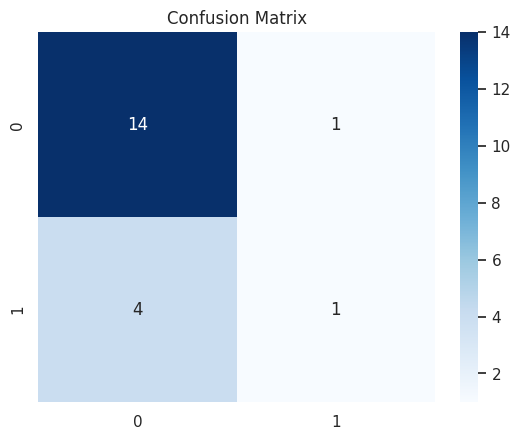

In [6]:
#Churn Classification

df_churn = pd.read_csv("churn.csv")


df_churn.drop(['customerID'], axis=1, inplace=True)
df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
df_churn = pd.get_dummies(df_churn, drop_first=True)

X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [7]:
#Spending Regression

df_spending = pd.read_csv("spending.csv")

X = df_spending[['Basket_Size', 'Time_on_Site', 'Clicks']]
y = df_spending['Purchase_Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 3
[LightGBM] [Info] Start training from score 265.756437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Due to the small dataset size, the regression model showed weak performance. However, it demonstrates the process of modeling and evaluation.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ieschev/gwxup195.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ieschev/94_uxmir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28696', 'data', 'file=/tmp/tmp6ieschev/gwxup195.json', 'init=/tmp/tmp6ieschev/94_uxmir.json', 'output', 'file=/tmp/tmp6ieschev/prophet_modellsmg76qg/prophet_model-20250520173850.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:38:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:38:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


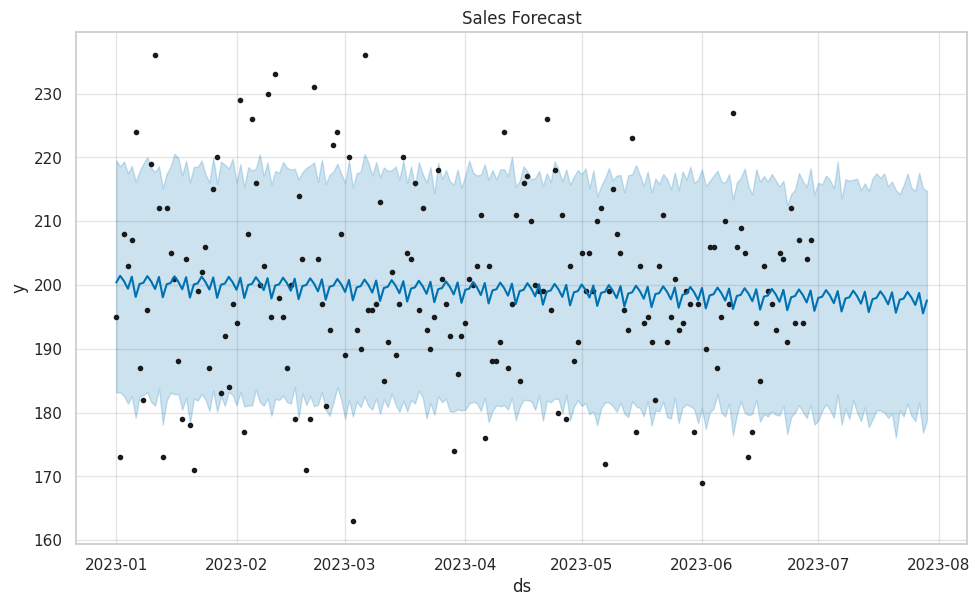

In [8]:
#Sales Forecasting

df_sales = pd.read_csv("sales.csv")
df_sales = df_sales.rename(columns={'Date': 'ds', 'Sales': 'y'})
df_sales['ds'] = pd.to_datetime(df_sales['ds'])

model = Prophet()
model.fit(df_sales)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title("Sales Forecast")
plt.show()
